In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


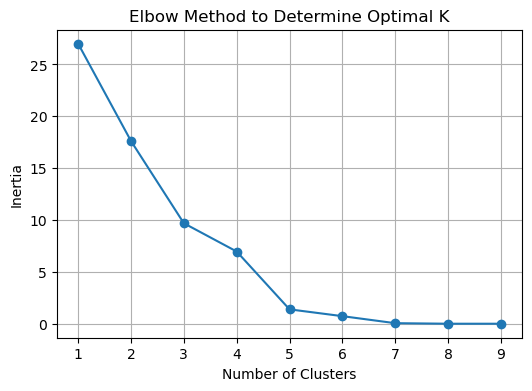


📊 Cluster Summary:
               Revenue  ContractLength  ChurnStatus
Cluster                                           
0         2968.105000            21.0          1.0
1         3439.376667            25.0          0.0
2        26650.650000            12.0          0.0


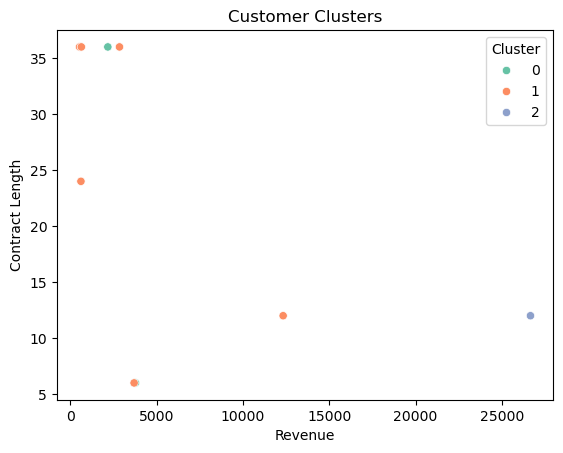

In [5]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
df = pd.read_csv(r"C:\Users\geeze\Downloads\Last Final Datasets\Task3 Sales Dashboard for a SaaS Company\Task3\mock_Datasets\CustomerSalesDatasql.csv")

# Step 2: Preprocess
# Convert ChurnStatus to binary if it's in 'Y'/'N' format
if df['ChurnStatus'].dtype == object:
    df['ChurnStatus'] = df['ChurnStatus'].map({'Y': 1, 'N': 0})

# Step 3: Drop rows with missing values in required columns
df = df[['Revenue', 'ContractLength', 'ChurnStatus']].dropna()

# Step 4: Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Step 5: Find optimal number of clusters (Elbow method)
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 6: Choose K and fit model
optimal_k = 3  # Based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 7: Analyze clusters
cluster_summary = df.groupby('Cluster')[['Revenue', 'ContractLength', 'ChurnStatus']].mean()
print("\n📊 Cluster Summary:\n", cluster_summary)

# Optional: Visualize
sns.scatterplot(data=df, x='Revenue', y='ContractLength', hue='Cluster', palette='Set2')
plt.title("Customer Clusters")
plt.xlabel("Revenue")
plt.ylabel("Contract Length")
plt.show()


In [7]:
df['Cluster'] = kmeans.fit_predict(scaled_features)


In [9]:
# Step: Export to CSV
df.to_csv("CustomerSalesDatapy.csv", index=False)
print("✅ File exported as CustomerSalesDatapy.csv")

✅ File exported as CustomerSalesDatapy.csv
